### Table Contents
1. .[Importing Librarires](#key1)
2. .[Reading Data](#key2)
3. .[Data Prepocessing](#key3)   
4. .[EDA](#key4)
5. .[ML Model](#key5)

# 1.Importing Libraries<a class='anchor' id='key1'>

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# 2.Reading Data <a class='anchor' id='key2'>

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

# 3.Data Preprocessing <a class='anchor' id='key3'>

In [6]:
print("Null values in train" , train.isna().values.sum())
print("Null values in test" , test.isna().values.sum())
print("Duplicate values in test and train" , sum(test.duplicated()) , sum(train.duplicated()))

Null values in train 0
Null values in test 0
Duplicate values in test and train 0 0


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'SITTING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_UPSTAIRS'),
  Text(5, 0, 'WALKING_DOWNSTAIRS')])

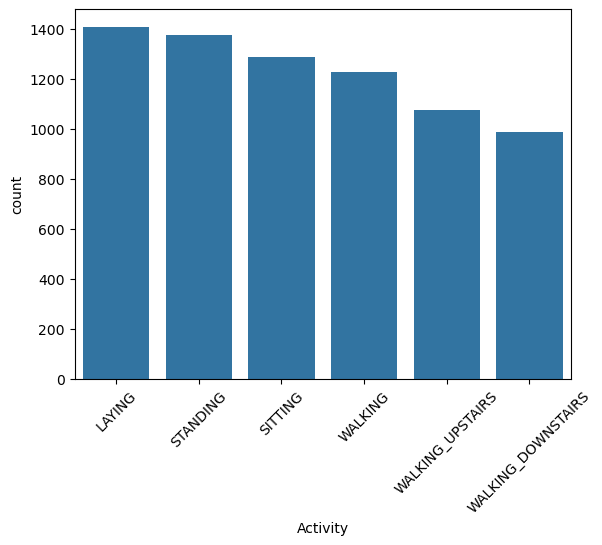

In [7]:
sns.countplot(data=train,x='Activity',order=train['Activity'].value_counts().index)
plt.xticks(rotation=45)

# 4.EDA <a class='anchor' id='key4' >

In [8]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train]),orient='index').rename(columns={0:'count'}).sort_values('count',ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### Analyzing tBodyAccMag-mean()

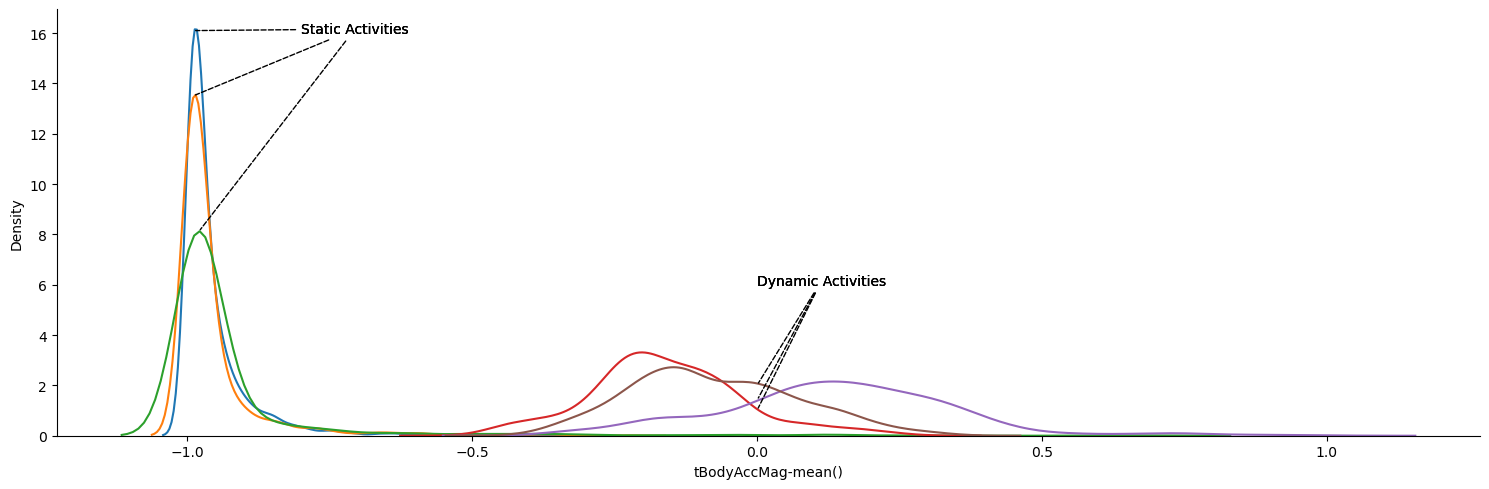

In [28]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False)
plt.annotate('Static Activities',xy=(-.98,8.1),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.99,13.5),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Static Activities',xy=(-.99,16.1),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate('Dynamic Activities',xy=(0,1),xytext=(0,6),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(0,1.4),xytext=(0,6),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(0,2),xytext=(0,6),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.show()

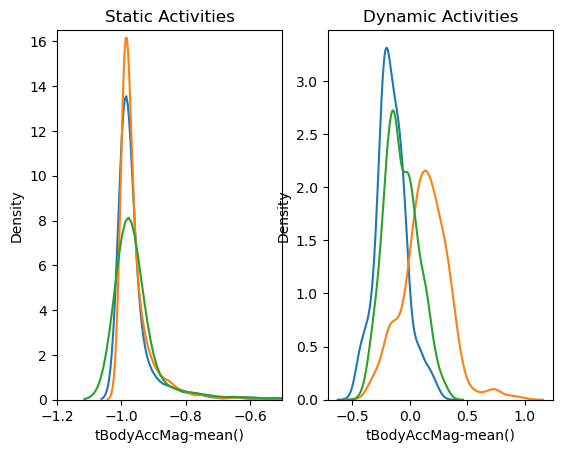

In [29]:
plt.subplot(1,2,1)
plt.title('Static Activities')
sns.distplot(train[train['Activity']=='SITTING']['tBodyAccMag-mean()'],label='Sitting',hist=False)
sns.distplot(train[train['Activity']=='STANDING']['tBodyAccMag-mean()'],label='Standing',hist=False)
sns.distplot(train[train['Activity']=='LAYING']['tBodyAccMag-mean()'],label='Laying',hist=False)
plt.axis([-1.2,-.5,0,16.5])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train['Activity']=='WALKING']['tBodyAccMag-mean()'],label='Walking',hist=False)
sns.distplot(train[train['Activity']=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],label='Walking-Downstairs',hist=False)
sns.distplot(train[train['Activity']=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],label='Walking-Upstairs',hist=False)
plt.show()

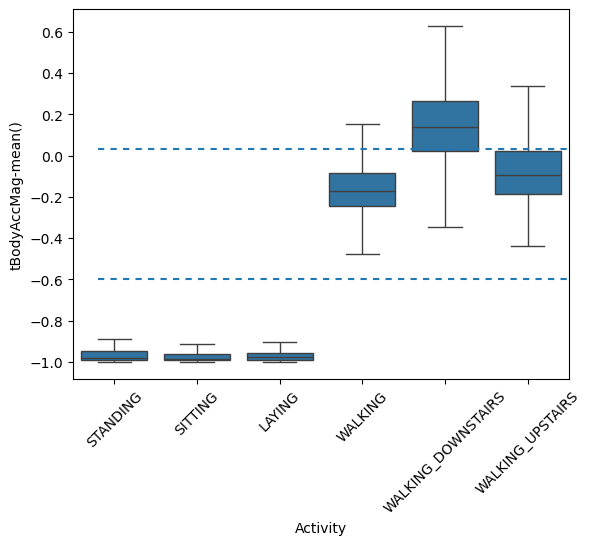

In [43]:
sns.boxplot(data=train,x='Activity',y='tBodyAccMag-mean()',showfliers=False)
plt.xticks(rotation=45)
plt.axhline(y=-.6,xmin=.05,dashes=(3,3))
plt.axhline(y=.03,xmin=.05,dashes=(3,3))
plt.show()

### Analyzing the relation between body X-axis,body Y-axis and gravity

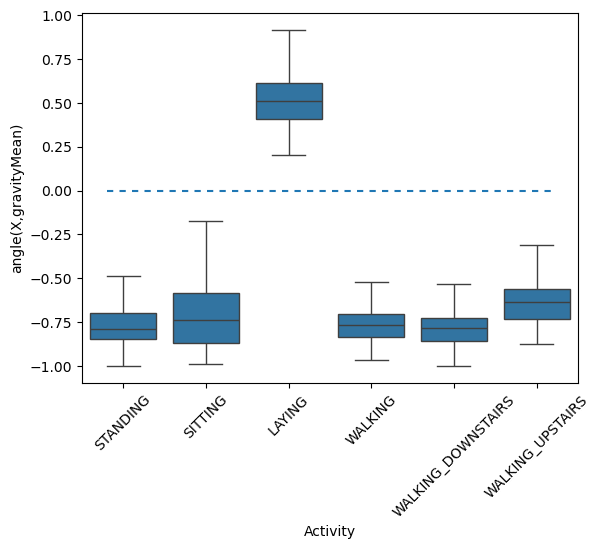

In [48]:
sns.boxplot(data=train,x='Activity',y='angle(X,gravityMean)',showfliers=False)
plt.xticks(rotation=45)
plt.axhline(y=0,xmin=.05,xmax=.95,dashes=(3,3))
plt.show()

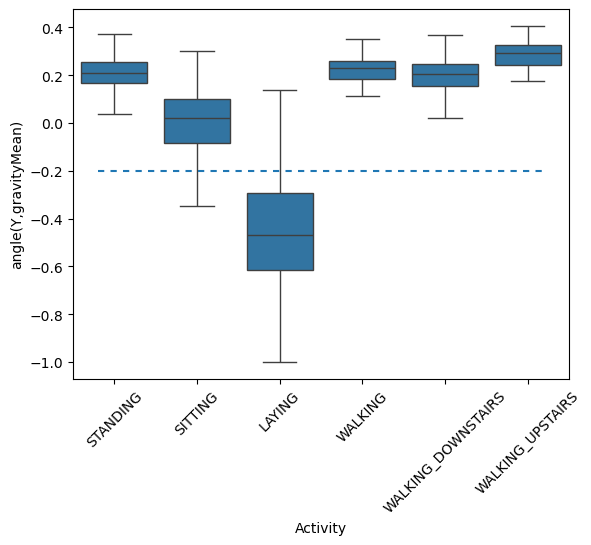

In [51]:
sns.boxplot(data=train,x='Activity',y='angle(Y,gravityMean)',showfliers=False)
plt.xticks(rotation=45)
plt.axhline(y=-.2,xmin=.05,xmax=.95,dashes=(3,3))
plt.show()

### PCA

In [52]:
x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

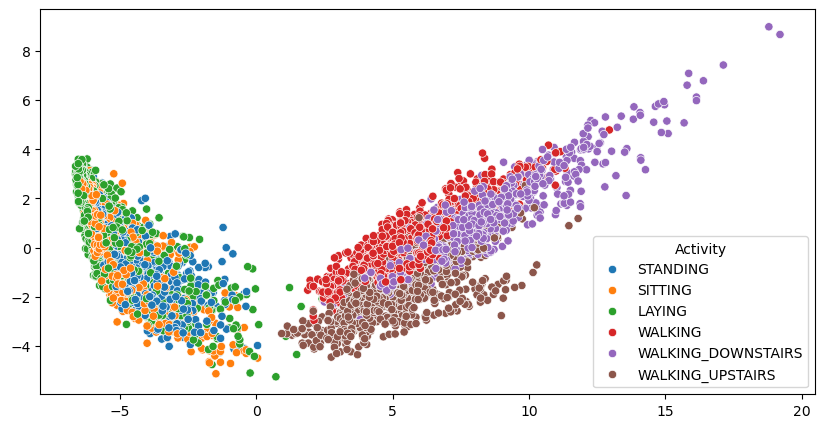

In [55]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])

### t-SNE

In [59]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

<Axes: >

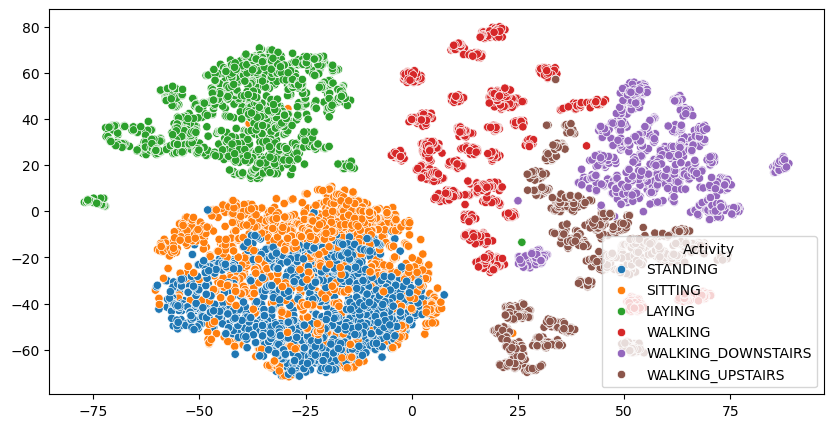

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])

# 5.ML Model <a class='anchor' id='key5'>

In [63]:
x_train=train.drop(['subject','Activity'],axis=1)
y_train=train.Activity
x_test=test.drop(['subject','Activity'],axis=1)
y_test=test.Activity
print('Shape of xtrain and xtest' , xtrain.shape , xtest.shape)

Shape of xtrain and xtest (7352, 561) (999, 561)


### Logistic Regression with Hyperparameter tuning and cross-validation

In [77]:
parameters={'max_iter':[100,200,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=3)
lr_classifier_rs.fit(x_train,y_train)
y_pred_lr=lr_classifier_rs.predict(x_test)

In [103]:
lr_accuracy=accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print("Accuracy of Logistic Regression",lr_accuracy)

Accuracy of Logistic Regression 0.953953953953954


In [79]:
cm=confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   9, 168,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [113]:
def plot_confusion_matrix(cm,labels):
    fig,ax=plt.subplots(figsize=(12,7))
    im=ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=labels,
           yticklabels=labels,ylabel='True label',xlabel='Predicted label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha='center',va='center',color='white' if cm[i,j]>thresh else 'black')
    fig.tight_layout()

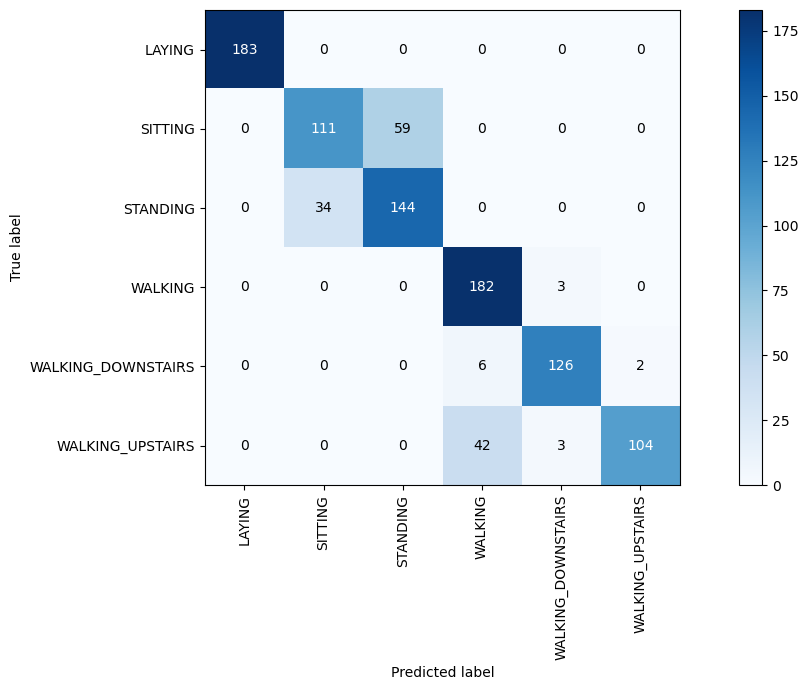

In [114]:
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [92]:
def get_best_results(model):
    print("Best estimator :",model.best_estimator_)
    print("Best parameters :",model.best_params_)
    print("Best score :",model.best_score_)

In [93]:
get_best_results(lr_classifier_rs)

Best estimator : LogisticRegression(max_iter=200)
Best parameters : {'max_iter': 200}
Best score : 0.9371672747957103


### SVM Model

In [96]:
parameters={'kernel':['rbf','sigmoid','linear','poly'],'C':[100,50]}
svc_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=3)
svc_rs.fit(x_train,y_train)
y_pred_svc=svc_rs.predict(xtest)
svc_accuracy=accuracy_score(y_test,y_pred_svc)
print("Accuracy of SVM Model",svc_accuracy)

Accuracy of SVM Model 0.965965965965966


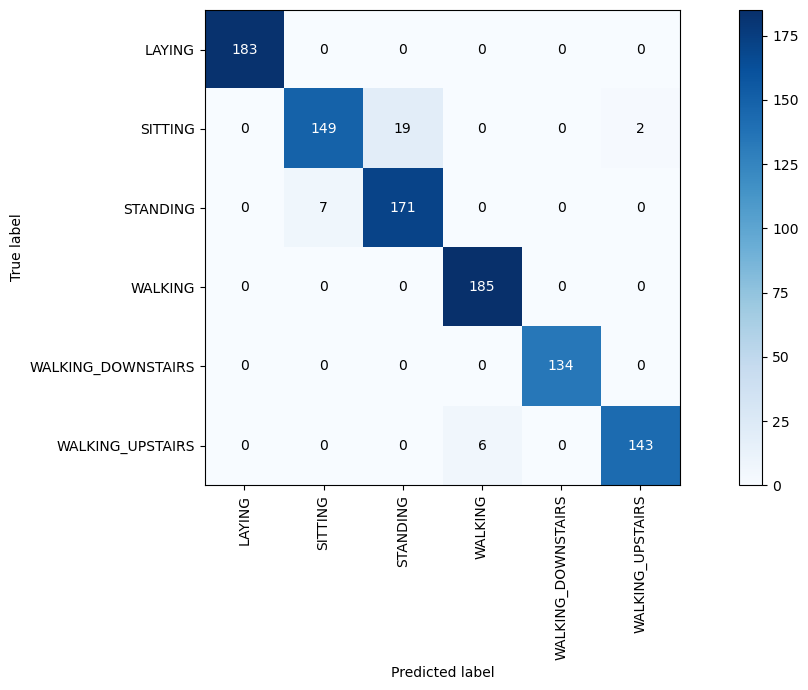

In [115]:
cm=confusion_matrix(y_test.values,y_pred_svc)
plot_confusion_matrix(cm,np.unique(y_pred_svc))

In [102]:
get_best_results(svc_rs)

Best estimator : SVC(C=50)
Best parameters : {'kernel': 'rbf', 'C': 50}
Best score : 0.9464109332023303


### Decision Tree Model

In [119]:
parameters={'max_depth':np.arange(6,15,2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parameters,cv=5,random_state=3)
dt_classifier_rs.fit(x_train,y_train)
y_pred_dt=dt_classifier_rs.predict(x_test)
dt_accuracy=accuracy_score(y_test,y_pred_dt)
print("Accuracy of Decision Tree Classifier:",dt_accuracy)

Accuracy of Decision Tree Classifier: 0.8478478478478478


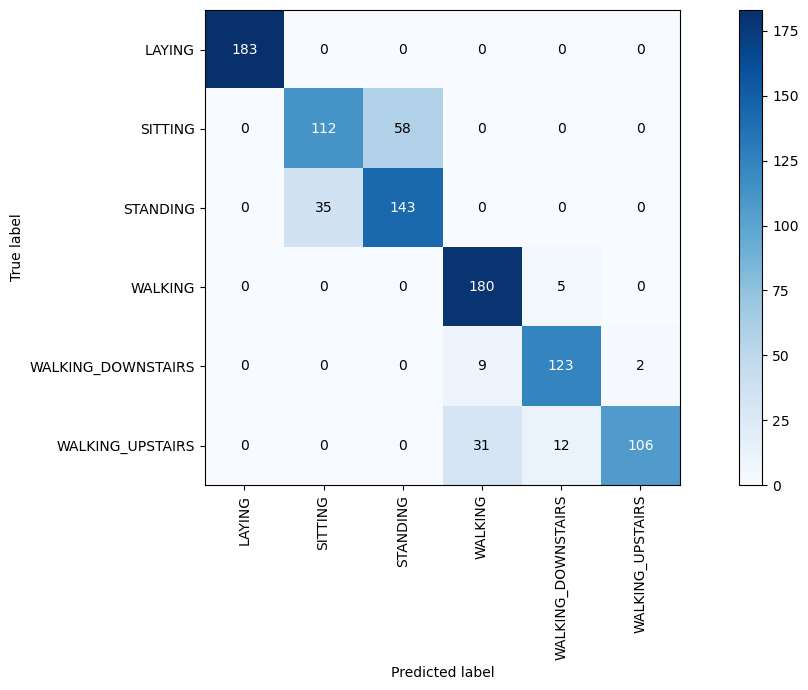

In [122]:
cm=confusion_matrix(y_test.values,y_pred_dt)
plot_confusion_matrix(cm,np.unique(y_pred_dt))

In [123]:
get_best_results(dt_classifier_rs)

Best estimator : DecisionTreeClassifier(max_depth=10)
Best parameters : {'max_depth': 10}
Best score : 0.8561044594588344


### Random Forest Model

In [124]:
parameters={'n_estimators':np.arange(20,101,10),'max_depth':np.arange(6,15,2)}
rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier,param_distributions=parameters,cv=5,random_state=3)
rf_classifier_rs.fit(x_train,y_train)
y_pred_rf=rf_classifier_rs.predict(x_test)
rf_accuracy=accuracy_score(y_test,y_pred_rf)
print("Accuracy of Decision Tree Classifier:",rf_accuracy)

Accuracy of Decision Tree Classifier: 0.9209209209209209


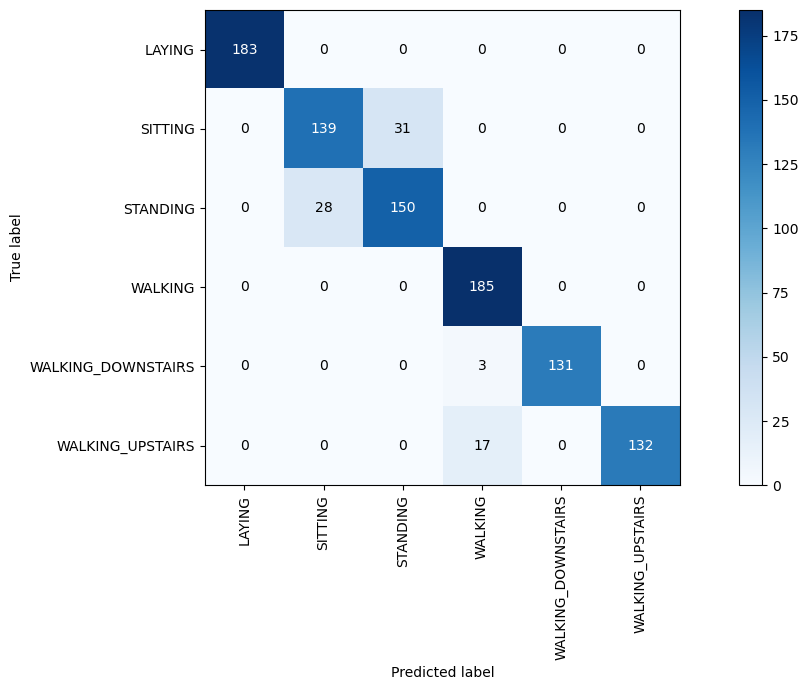

In [125]:
cm=confusion_matrix(y_test.values,y_pred_rf)
plot_confusion_matrix(cm,np.unique(y_pred_rf))

In [126]:
get_best_results(rf_classifier_rs)

Best estimator : RandomForestClassifier(max_depth=14)
Best parameters : {'n_estimators': 100, 'max_depth': 14}
Best score : 0.9201609345301682
